<a href="https://colab.research.google.com/github/XuRui314/MCM/blob/main/M2020C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 题目

在其创建的在线市场中，亚马逊为客户提供了评价和评论购买的机会。 个人评级 - 称为“星级评级” - 允许购买者使用 1（低评级、低满意度）到 5（高评级、高满意度）的等级来表达他们对产品的满意度。 此外，客户可以提交基于文本的消息（称为“评论”），表达有关产品的进一步意见和信息。 其他客户可以提交对这些评论是否有帮助的评级——称为“有用评级”——以帮助他们做出自己的产品购买决定。 公司使用这些数据来深入了解他们参与的市场、参与的时间以及产品设计功能选择的潜在成功。

Sunshine 公司计划在在线市场上推出和销售三种新产品：微波炉、婴儿奶嘴和吹风机。 他们聘请了您的团队作为顾问，以识别过去客户提供的与其他竞争产品相关的评级和评论中的关键模式、关系、度量和参数，以 1) 告知他们的在线销售策略，以及 2) 识别潜在的重要设计功能，以增强 产品的可取性。 Sunshine Company 过去曾使用数据来指导销售策略，但他们以前没有使用过这种特定组合和类型的数据。 Sunshine Company 特别感兴趣的是这些数据中基于时间的模式，以及它们是否以有助于公司打造成功产品的方式进行交互。

为了帮助您，Sunshine 的数据中心为您提供了该项目的三个数据文件：hair_dryer.tsv、microwave.tsv 和 pacifier.tsv。 这些数据代表买家提供的对亚马逊上销售的微波炉、婴儿奶嘴和吹风机的评级和评论
数据中指示的时间段内的市场。 还提供了数据标签定义的词汇表。 所提供的数据文件包含您应对此问题使用的唯一数据。

1. 分析提供的三个产品数据集，用数学证据、有意义的定量和/或定性模式、关系、度量和参数来识别、描述和支持星级、评论和有用性评级内部和之间的参数，这些
将帮助 Sunshine Company 成功推出三款新的在线市场产品。
2. 使用你的分析来解决阳光公司营销总监提出的以下具体问题和要求：
  -  一旦 Sunshine Company 的三种产品在在线市场上销售，根据评级和评论确定数据量度，这些量度对 Sunshine Company 来说是最有用的跟踪信息。
  -  确定并讨论每个数据集中基于时间的度量和模式，这些度量和模式可能表明产品在在线市场中的声誉正在上升或下降。
  -  确定最能表明潜在成功或失败产品的基于文本的度量和基于评级的度量的组合。
  - 特定的星级评分会引发更多评论吗？ 例如，客户在看到一系列低星级评分后是否更有可能撰写某种类型的评论？
  -  基于文本的评论的特定质量描述符（例如“热情”、“失望”等）是否与评级水平密切相关？
3. 给 Sunshine Company 的营销总监写一封长达一到两页的信，总结您团队的分析和结果。 包括您的团队最有信心向营销总监推荐的结果的具体理由。
您提交的内容应包括：
- 一页摘要表
- 目录
- 一页到两页的信
- 您的解决方案不超过 20 页，最多 24 页，包括摘要表、目录和两页的信函。

注意：参考列表和任何附录不计入页数限制，应该出现在您完成解决方案之后。 您不应使用未经授权的图像和材料其使用受版权法限制。 确保你引用了你的想法的来源和报告中使用的材料

**概述:**

总结起来就是亚马逊有个评论反馈系统，包含两种类型的评价：顾客对商品的评价，以及这种购买评价对于其他用户有用程度的评价。现在Sunshine公司想卖三种新产品，分别是**微波炉、婴儿奶嘴和吹风机**，根据过去的评论数据来设计一套在线销售的策略，然后确定重要的设计特征，可以加强商品的竞争力购买欲。

需要解决的问题：
1. 确定和讨论决定一个产品随着时间评价变化的数据特征
2. 根据挖掘的特征决定三种产品中最有可能成功和失败的那个
3. 评级和评论的联系
4. 情感/主题和评级的关系

模型需要包含的性质：
1. 能够基于已有的数据获得最有商业价值的数据特征和衡量标准


处理思路：1. EDA分析（基本信息） 2. 特征挖掘：文本上的和数据上的。文本上的用NLP的一些方法，注意分组（时间/每个类别）

**分析数据集**

In [2]:
# preparation
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/MyDrive/dataset/MathModel/M2020C")
!ls

hair_dryer.csv	microwave.csv  pacifier.csv
hair_dryer.tsv	microwave.tsv  pacifier.tsv


数据集定义：每行代表划分为以下列的数据。
- marketplace（字符串）：评论所在市场的 2 个字母国家代码
书面。
- customer_id（字符串）：可用于聚合评论的随机标识符
一个作者。
- review_id（字符串）：评论的唯一 ID。
- product_id（字符串）：评论所属的唯一产品 ID。
- product_parent（字符串）：可用于汇总评论的随机标识符
同样的产品。
- product_title（字符串）：产品的标题。
- product_category（字符串）：产品的主要消费者类别。
- star_rating (int)：评论的 1-5 星级。
- helpful_votes (int): 有用的投票数。
- total_votes (int)：评论收到的总票数。
- vine (string): 邀请客户成为 Amazon Vine Voices，基于他们在亚马逊社区中赢得的信任，以撰写准确而有见地的评论。 亚马逊向 Amazon Vine 会员免费提供供应商提交给该计划的产品副本。 Amazon 不影响 Amazon Vine 会员的意见，也不修改或编辑评论。
- verified_purchase（字符串）：“Y”表示亚马逊确认撰写评论的人在亚马逊购买了产品并且没有以大幅折扣收到产品。
折扣。
- review_headline（字符串）：评论的标题。
- review_body（字符串）：评论文本。
- review_date (bigint)：撰写评论的日期。

In [4]:
import pandas as pd
import numpy as np
Hair = pd.read_csv('hair_dryer.tsv', sep='\t')
Hair.to_csv('hair_dryer.csv')
Hair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11470 entries, 0 to 11469
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        11470 non-null  object
 1   customer_id        11470 non-null  int64 
 2   review_id          11470 non-null  object
 3   product_id         11470 non-null  object
 4   product_parent     11470 non-null  int64 
 5   product_title      11470 non-null  object
 6   product_category   11470 non-null  object
 7   star_rating        11470 non-null  int64 
 8   helpful_votes      11470 non-null  int64 
 9   total_votes        11470 non-null  int64 
 10  vine               11470 non-null  object
 11  verified_purchase  11470 non-null  object
 12  review_headline    11468 non-null  object
 13  review_body        11470 non-null  object
 14  review_date        11470 non-null  object
dtypes: int64(5), object(10)
memory usage: 1.3+ MB


In [5]:
Hair.nunique()

marketplace              1
customer_id          11348
review_id            11470
product_id             538
product_parent         473
product_title          503
product_category         1
star_rating              5
helpful_votes          111
total_votes            119
vine                     2
verified_purchase        2
review_headline       7696
review_body          11197
review_date           2307
dtype: int64

In [7]:
Mico = pd.read_csv('microwave.tsv', sep='\t')
Mico.to_csv('microwave.csv')

Paci = pd.read_csv('pacifier.tsv', sep='\t')
Paci.to_csv('pacifier.csv')

In [8]:
Mico.nunique()

marketplace             2
customer_id          1612
review_id            1615
product_id             80
product_parent         55
product_title          58
product_category        2
star_rating             5
helpful_votes          67
total_votes            75
vine                    3
verified_purchase       4
review_headline      1346
review_body          1601
review_date           906
dtype: int64

In [11]:
Mico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        1615 non-null   object
 1   customer_id        1615 non-null   int64 
 2   review_id          1615 non-null   object
 3   product_id         1615 non-null   object
 4   product_parent     1615 non-null   int64 
 5   product_title      1615 non-null   object
 6   product_category   1615 non-null   object
 7   star_rating        1615 non-null   int64 
 8   helpful_votes      1615 non-null   int64 
 9   total_votes        1615 non-null   int64 
 10  vine               1615 non-null   object
 11  verified_purchase  1615 non-null   object
 12  review_headline    1615 non-null   object
 13  review_body        1615 non-null   object
 14  review_date        1615 non-null   object
dtypes: int64(5), object(10)
memory usage: 189.4+ KB


In [9]:
Paci.nunique()

marketplace              2
customer_id          17661
review_id            18939
product_id            6482
product_parent        5432
product_title         5533
product_category         2
star_rating              5
helpful_votes           76
total_votes             79
vine                     4
verified_purchase        4
review_headline      12611
review_body          18085
review_date           1908
dtype: int64

In [10]:
Paci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18939 entries, 0 to 18938
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        18939 non-null  object
 1   customer_id        18939 non-null  int64 
 2   review_id          18939 non-null  object
 3   product_id         18939 non-null  object
 4   product_parent     18939 non-null  int64 
 5   product_title      18939 non-null  object
 6   product_category   18939 non-null  object
 7   star_rating        18939 non-null  int64 
 8   helpful_votes      18939 non-null  int64 
 9   total_votes        18939 non-null  int64 
 10  vine               18939 non-null  object
 11  verified_purchase  18939 non-null  object
 12  review_headline    18939 non-null  object
 13  review_body        18937 non-null  object
 14  review_date        18939 non-null  object
dtypes: int64(5), object(10)
memory usage: 2.2+ MB


初步可以看到数据还是很完整的，但是评论的顾客群体基本上都是无重复的，而且针对评论的用户，得不到该产品针对顾客群体的定位（适合青少年、收入高群体等）。也没有盈利额和利润等信息，所以数据集本身还是非常局限的，只能反映用户对产品的评价和认可度。我们可以从中挖掘到产品的优点和缺点，在营销的过程中趋利避害，产品的设计中也要考虑用户的需求。

但这题的重点还是在分析，并不是以评价模型为主，而是要找到风评和评论、产品等特征的联系，并动态的考虑如何去追踪这些信息并作出决策。衡量找到特征有用的指标可以从模型本身的完备和识别模式的泛化性、普适性入手。

时间的作用不仅可以理解为季节性变化，更是反映了某些评论和打分对于产品购买量的影响，如果评论和打分出现了某种好的特性，一定可以反映在时间变化中（转折点），这是需要挖掘的。还需要注意Vine在其中的影响。

> 下面的处理默认按照吹风机那个数据集

## EDA

> 这部分的EDA就特指对于数字特征（评分、时间）的分析了，文本部分我放到下面NLP的章节。

看看每个产品的平均评分、平均评论有用数和这些分布，

In [36]:
Hair['helpful_rate'] = Hair['helpful_votes'] / Hair['total_votes']

In [38]:
Hair.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes,helpful_rate
count,1.147000e+04,1.147000e+04,11470.000000,11470.000000,11470.000000,4329.000000
mean,2.815122e+07,4.846338e+08,4.116042,2.179076,2.563296,0.750956
std,1.523877e+07,2.873240e+08,1.300333,14.241304,15.382528,0.357778
min,1.246400e+04,4.239600e+05,1.000000,0.000000,0.000000,0.000000
25%,1.491441e+07,2.351060e+08,4.000000,0.000000,0.000000,0.571429
50%,2.707123e+07,4.867740e+08,5.000000,0.000000,0.000000,1.000000
75%,4.233644e+07,7.322523e+08,5.000000,1.000000,1.000000,1.000000
max,5.309637e+07,9.994366e+08,5.000000,499.000000,575.000000,1.000000


In [34]:
# Hair['helpful_rate'] = Hair['helpful_rate'].fillna(0)

In [37]:
grouped_vine = Hair.groupby('vine')
grouped_vine.get_group('Y').describe() # 如果total_votes是0的话，helpful_rate就是NAN不会算入

,customer_id,product_parent,star_rating,helpful_votes,total_votes,helpful_rate
count,1.790000e+02,1.790000e+02,179.000000,179.000000,179.000000,110.000000
mean,3.889998e+07,4.213033e+08,4.441341,2.910615,3.787709,0.580733
std,1.335453e+07,2.174795e+08,0.757487,11.450570,13.033219,0.371689
min,1.088394e+07,1.274319e+08,2.000000,0.000000,0.000000,0.000000
25%,2.800730e+07,2.539180e+08,4.000000,0.000000,0.000000,0.350000
50%,4.278399e+07,3.037753e+08,5.000000,0.000000,1.000000,0.666667
75%,5.088777e+07,6.353867e+08,5.000000,2.000000,3.000000,0.920251
max,5.309637e+07,7.680630e+08,5.000000,114.000000,130.000000,1.000000


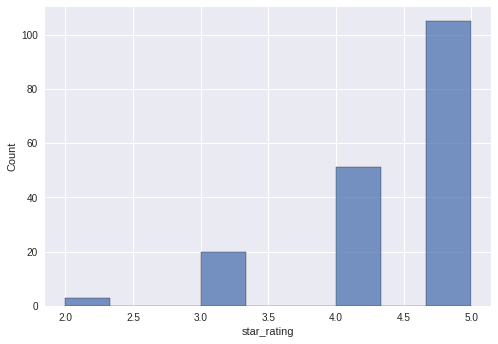

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn') 

sns.histplot(grouped_vine.get_group('Y')['star_rating'])

In [ ]:
tweets['Time'] = pd.to_datetime(tweets['Time'], format='%y-%m-%d %H:%M:%S')
tweetsT = tweets['Time']

trace = go.Histogram(
    x=tweetsT,
    marker=dict(
        color='blue'
    ),
    opacity=0.75
)

layout = go.Layout(
    title='Tweet Activity Over Years',
    height=450,
    width=1200,
    xaxis=dict(
        title='Month and year'
    ),
    yaxis=dict(
        title='Tweet Quantity'
    ),
    bargap=0.2,
)

data = [trace]

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

## NLP的一些处理

数据预处理：去除标点符号、以stopword划分。

在构建主题模型的的过程中，我们会发现“的”“地”“得”这样的词语无助于表达一个主题——由于这样的词语实在是太多了，在主题的词语分布中占有重要位置，导致我们总结一个主题的含义时遇到很大的困难。这个时候，去掉这些价值不大、有负作用的词语成为必需。为了提升主题的效果，我将语料中的停用词过滤后，再训练LDA。



In [ ]:
pip install pyLDAvis

In [47]:
import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict
import seaborn as sns
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import nltk

In [50]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [48]:
corpus=[]
a=[]
for i in range(len(Hair['review_body'])):
        a=Hair['review_body'][i]
        corpus.append(a)
corpus[0:10]

['Works great!',
 "This dries my hair faster that bigger, more powerful models. I love travel blow dryers because they are easy to lift and they usually come in 1600 w or less. Bigger dryers are heavy and blow my hair everywhere. This has a surprising amount of power and is very compact. I would give it a five except that the switch is not easy to turn on and off with one hand and it's noisier than I anticipated.",
 'Love this dryer!',
 'styling hair in style',
 "I just got this last week. I think's great. The cord length is perfect.",
 'Excellent dryer.',
 'Gets extremely hot - I have burned my hand on both the metal grate as well as the plastic body. After use I have to keep on the counter because it is too hot to put away. It has melted 2 different combs and now starts to smoke during use. My hair requires high heat to dry completely and not be frizzy, but this is unsafe and ridiculous. As soon as my new model arrives (not this brand) this is going in the trash!',
 'I found everythi

In [52]:
stoplist = stopwords.words('english')
texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]

dictionary = corpora.Dictionary(texts)
dictionary.save('comments.dict')  # store the dictionary, for future reference

/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


In [ ]:
print(dictionary.token2id)

In [54]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize('comments.mm', corpus)  # store to disk, for later use

/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


In [55]:
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model
corpus_tfidf = tfidf[corpus]  # step 2 -- use the model to transform vectors

LDA及一些可视化

In [ ]:
total_topics = 5
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi
#Show first n important word in the topics:
lda.show_topics(total_topics,5)


In [57]:
data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}
df_lda = pd.DataFrame(data_lda)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(5, 69)


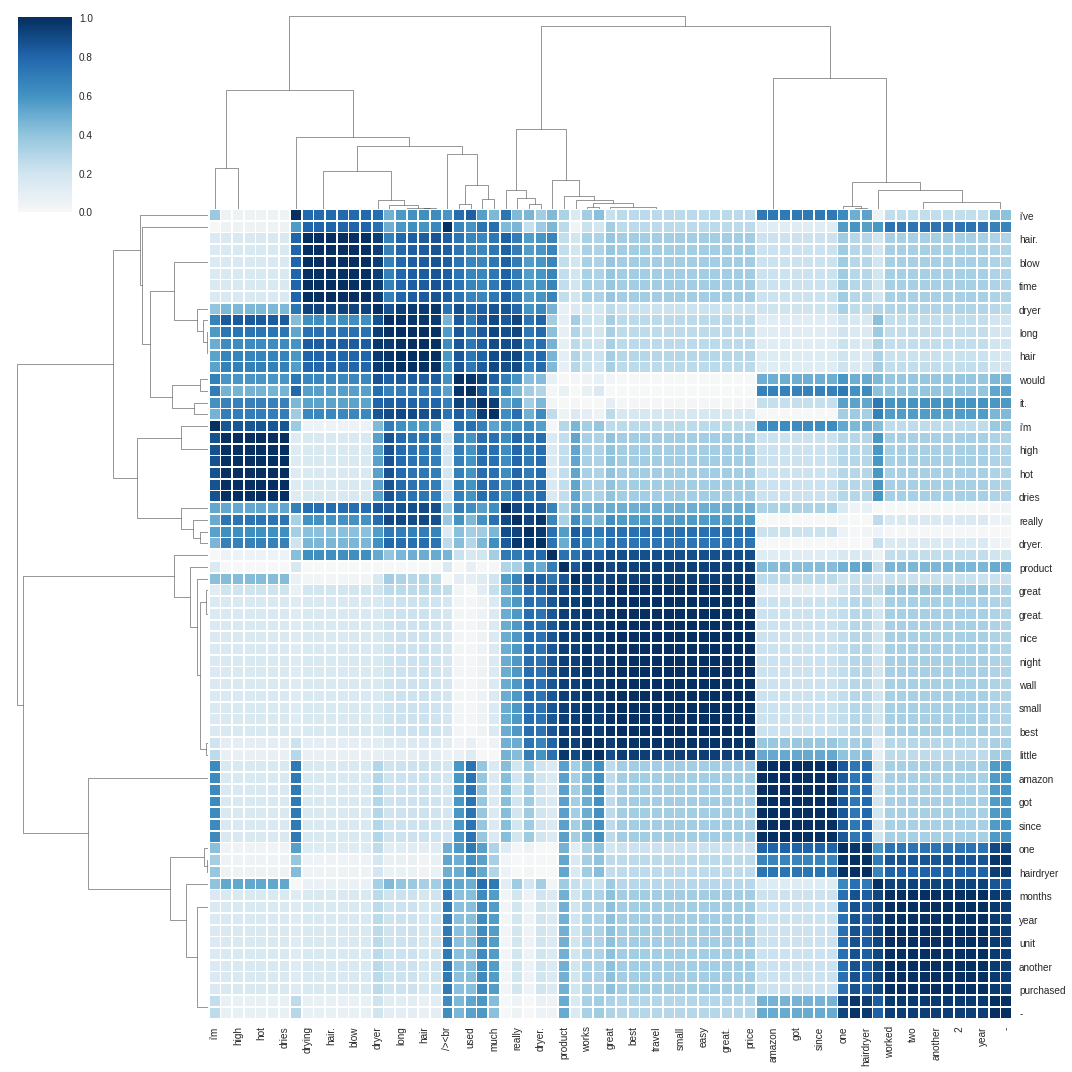

In [58]:
g=sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(15, 15))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [60]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim_models.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set '

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      150.222153  -72.269554       1        1  27.721098
3       51.163364 -159.968018       2        1  22.497530
4      -73.144554   21.523815       3        1  20.936316
1      -66.410133 -110.606438       4        1  18.493416
0       54.417324   12.443444       5        1  10.351641, topic_info=       Term        Freq       Total Category  logprob  loglift
18     hair  246.000000  246.000000  Default  30.0000  30.0000
182   dryer  199.000000  199.000000  Default  29.0000  29.0000
164   great  107.000000  107.000000  Default  28.0000  28.0000
200    good   67.000000   67.000000  Default  27.0000  27.0000
61      dry   37.000000   37.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
324   using    4.428136   30.251512   Topic5  -5.5915   0.3465
253    i've    4.366953   31.516298   Topic5  -5.6054   0.2916
302   hair.    4.298911   32.607899   Topic5  -5.6211   0.2418
164   great    5.289429  107.564857   Topic5  -5.4138  -0.7444
181  bought    4.143837   43.317949   Topic5  -5.6578  -0.0789

[441 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
6906      4  1.695656    $40
7255      3  0.908972     (a
5742      1  1.149259   (you
50        1  0.065120      -
50        2  0.097680      -
...     ...       ...    ...
732       1  0.088754  years
732       2  0.266262  years
732       3  0.355016  years
732       4  0.221885  years
732       5  0.088754  years

[729 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 5, 2, 1])

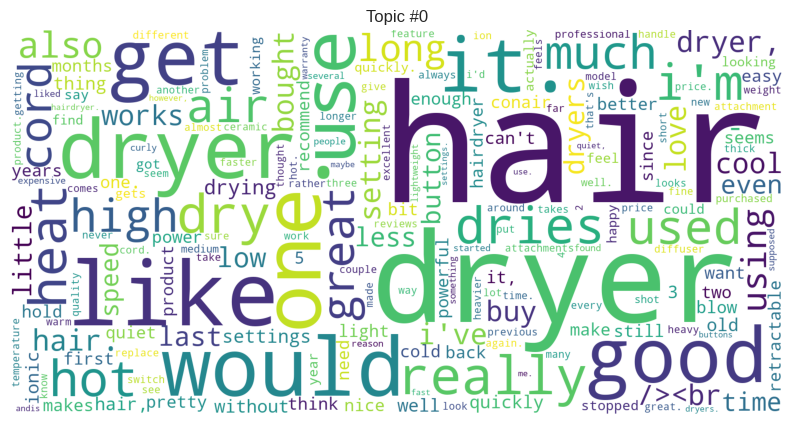

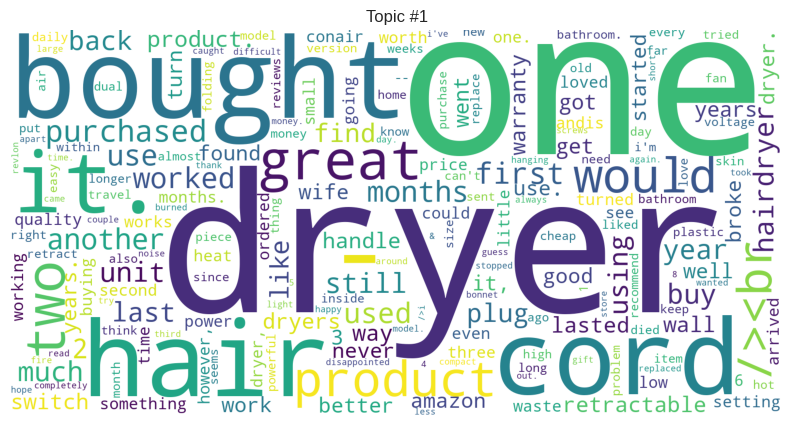

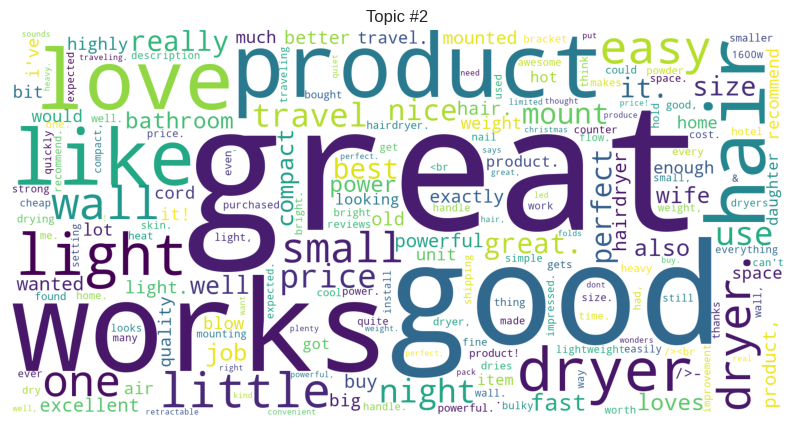

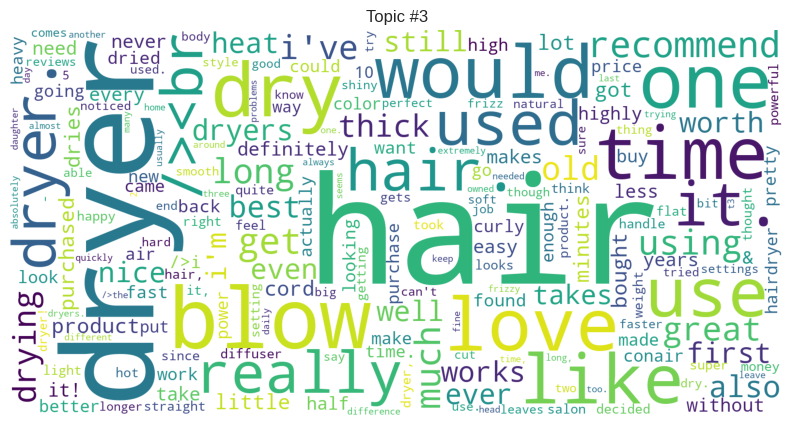

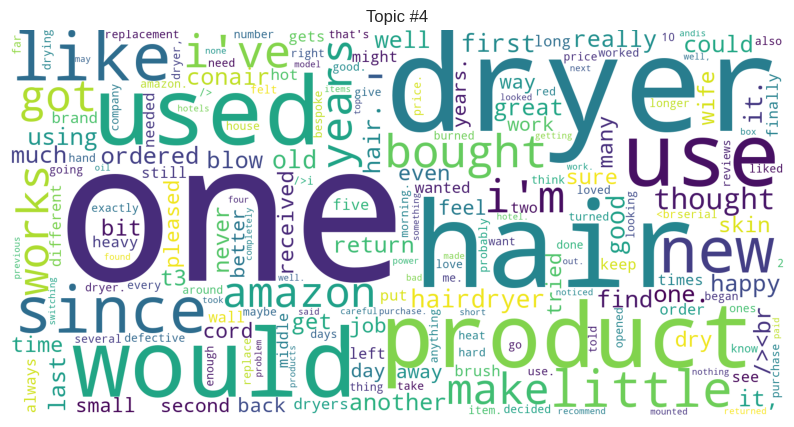

In [69]:
from wordcloud import WordCloud

for t in range(lda.num_topics):
  plt.figure(figsize=(10,6),dpi=100)

  plt.axis("off")
  plt.title("Topic #" + str(t))

  plt.imshow(WordCloud(background_color='white',width=1600, height=800).fit_words(dict(lda.show_topic(t, 200))))



In [ ]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()


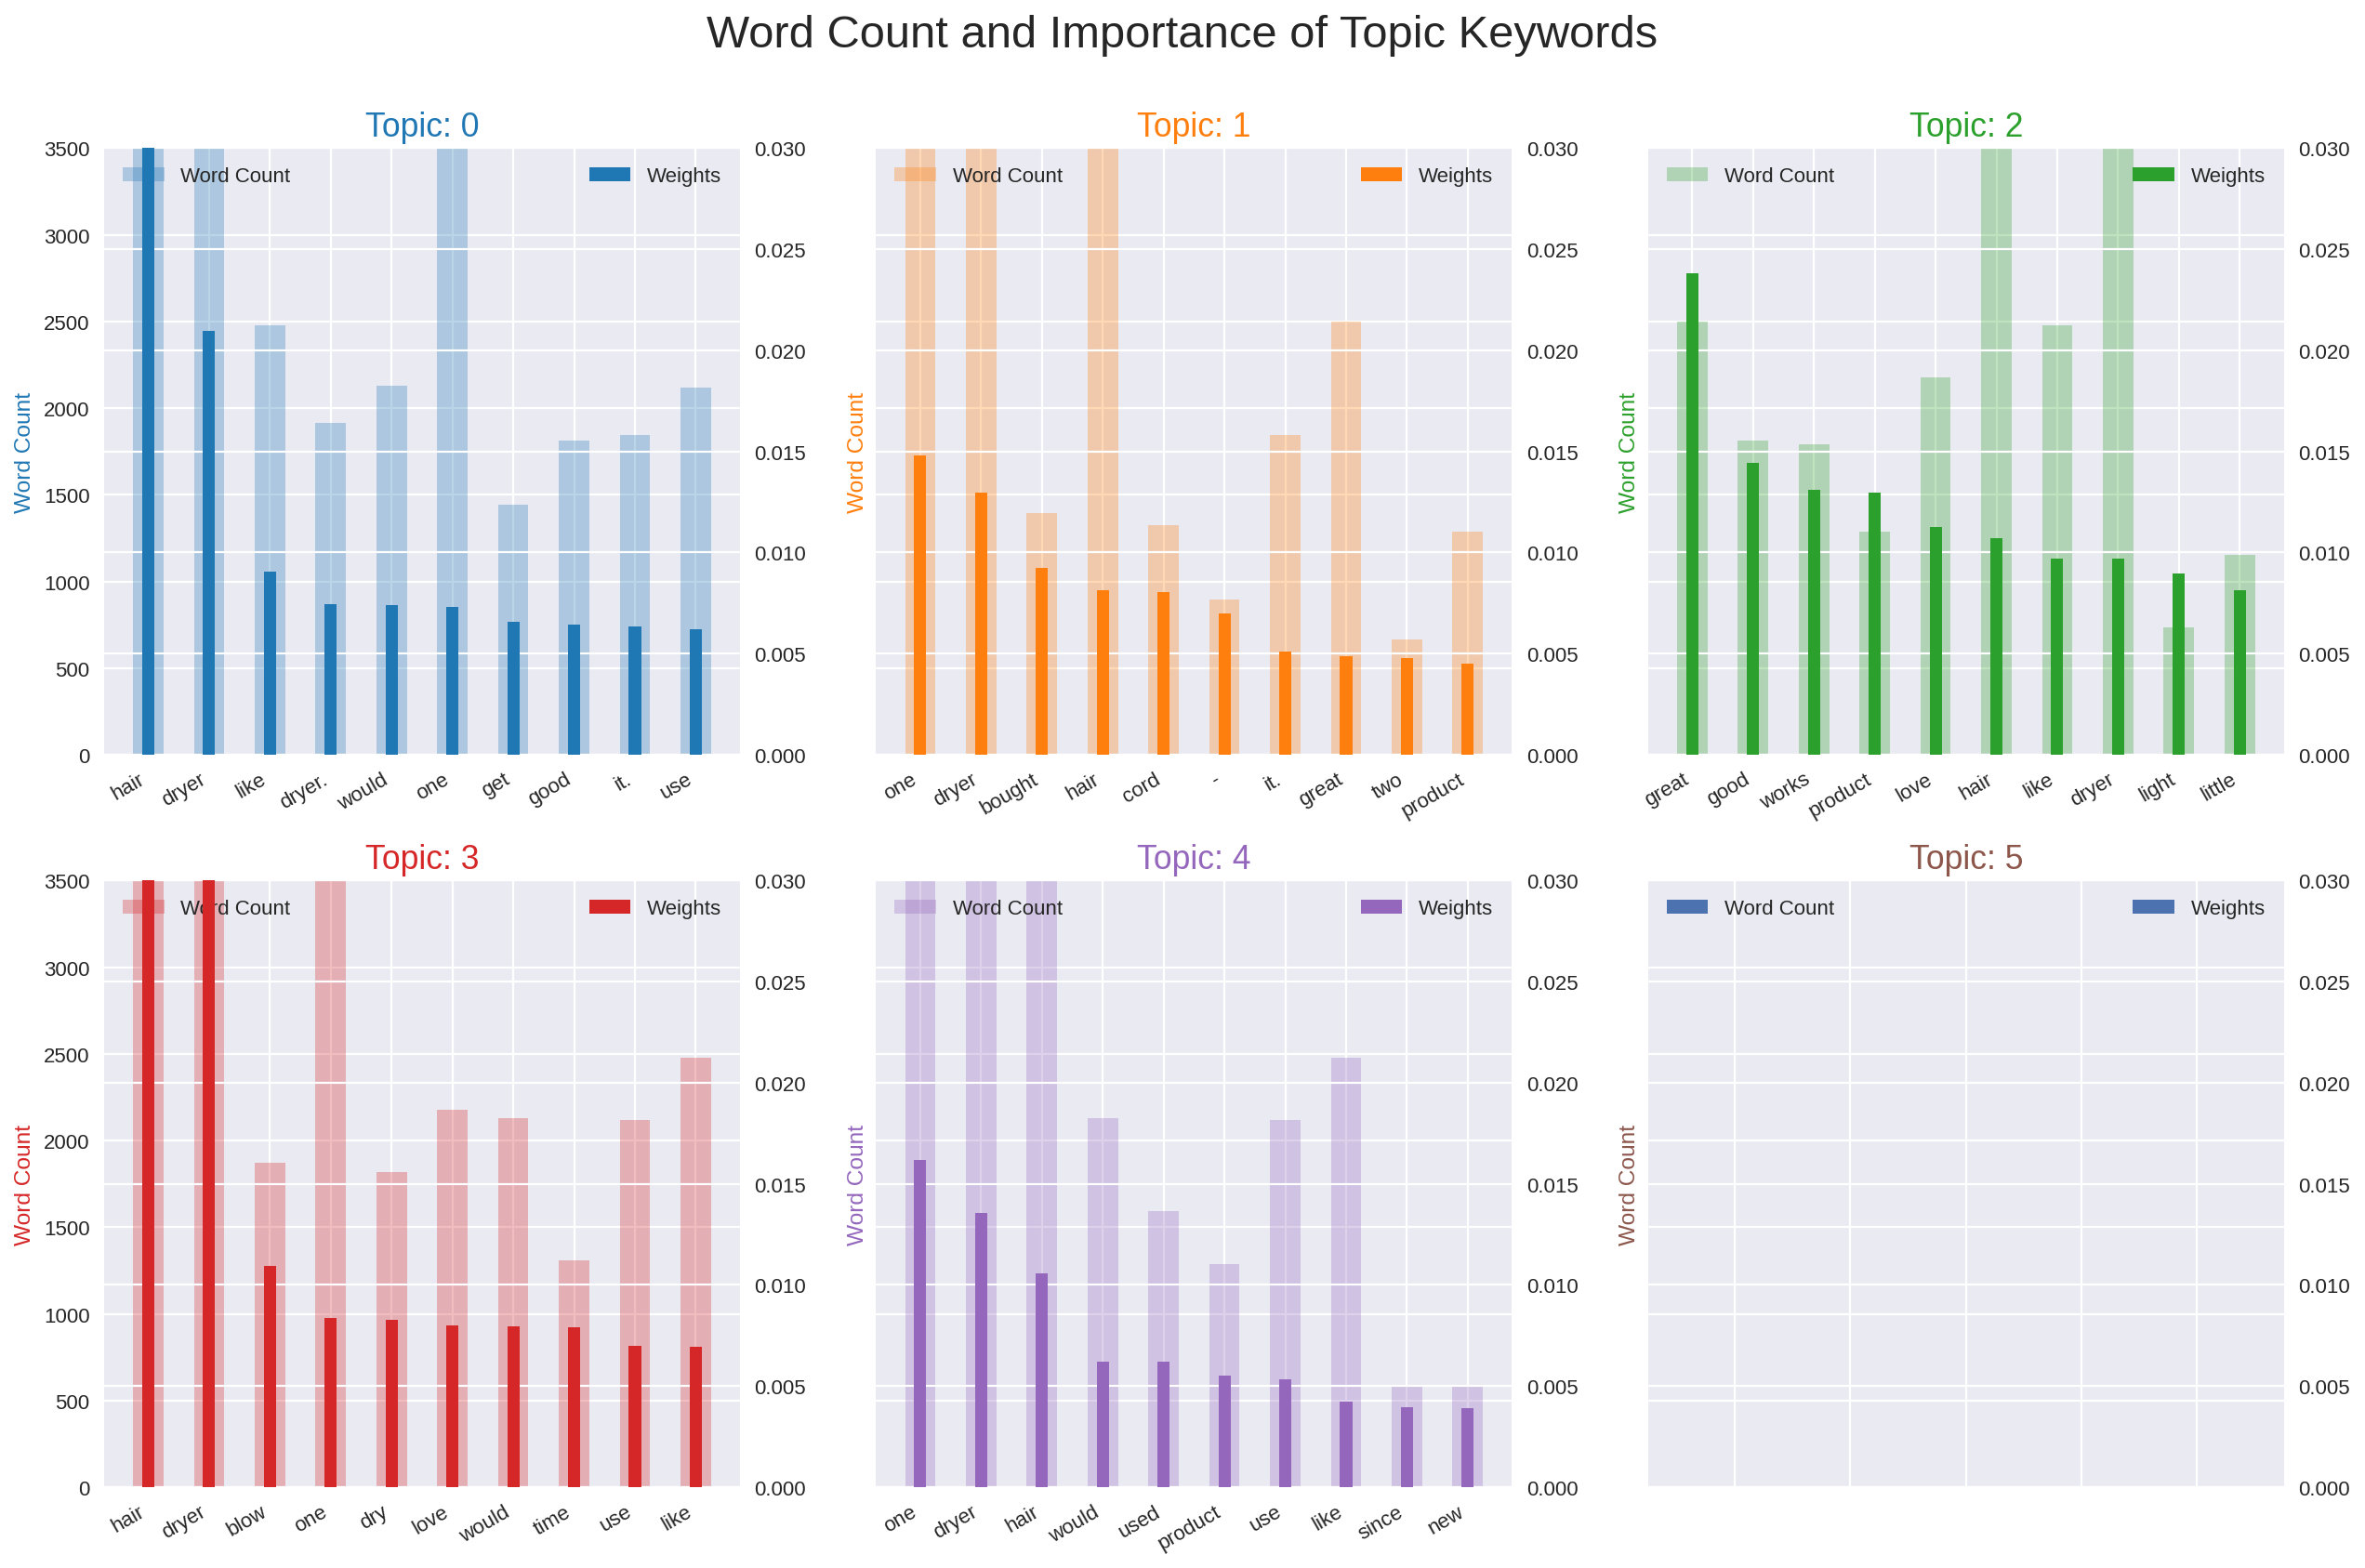

In [100]:
from collections import Counter
import matplotlib.colors as mcolors

topics = lda.show_topics(formatted=False)
data_flat = [w for w_list in texts for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 3, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()


In [105]:
lda.show_topics()

[(0,
  '0.041*"hair" + 0.021*"dryer" + 0.009*"like" + 0.007*"dryer." + 0.007*"would" + 0.007*"one" + 0.007*"get" + 0.006*"good" + 0.006*"it." + 0.006*"use"'),
 (1,
  '0.015*"one" + 0.013*"dryer" + 0.009*"bought" + 0.008*"hair" + 0.008*"cord" + 0.007*"-" + 0.005*"it." + 0.005*"great" + 0.005*"two" + 0.004*"product"'),
 (2,
  '0.024*"great" + 0.014*"good" + 0.013*"works" + 0.013*"product" + 0.011*"love" + 0.011*"hair" + 0.010*"like" + 0.010*"dryer" + 0.009*"light" + 0.008*"little"'),
 (3,
  '0.047*"hair" + 0.032*"dryer" + 0.011*"blow" + 0.008*"one" + 0.008*"dry" + 0.008*"love" + 0.008*"would" + 0.008*"time" + 0.007*"use" + 0.007*"like"'),
 (4,
  '0.016*"one" + 0.014*"dryer" + 0.011*"hair" + 0.006*"would" + 0.006*"used" + 0.006*"product" + 0.005*"use" + 0.004*"like" + 0.004*"since" + 0.004*"new"')]

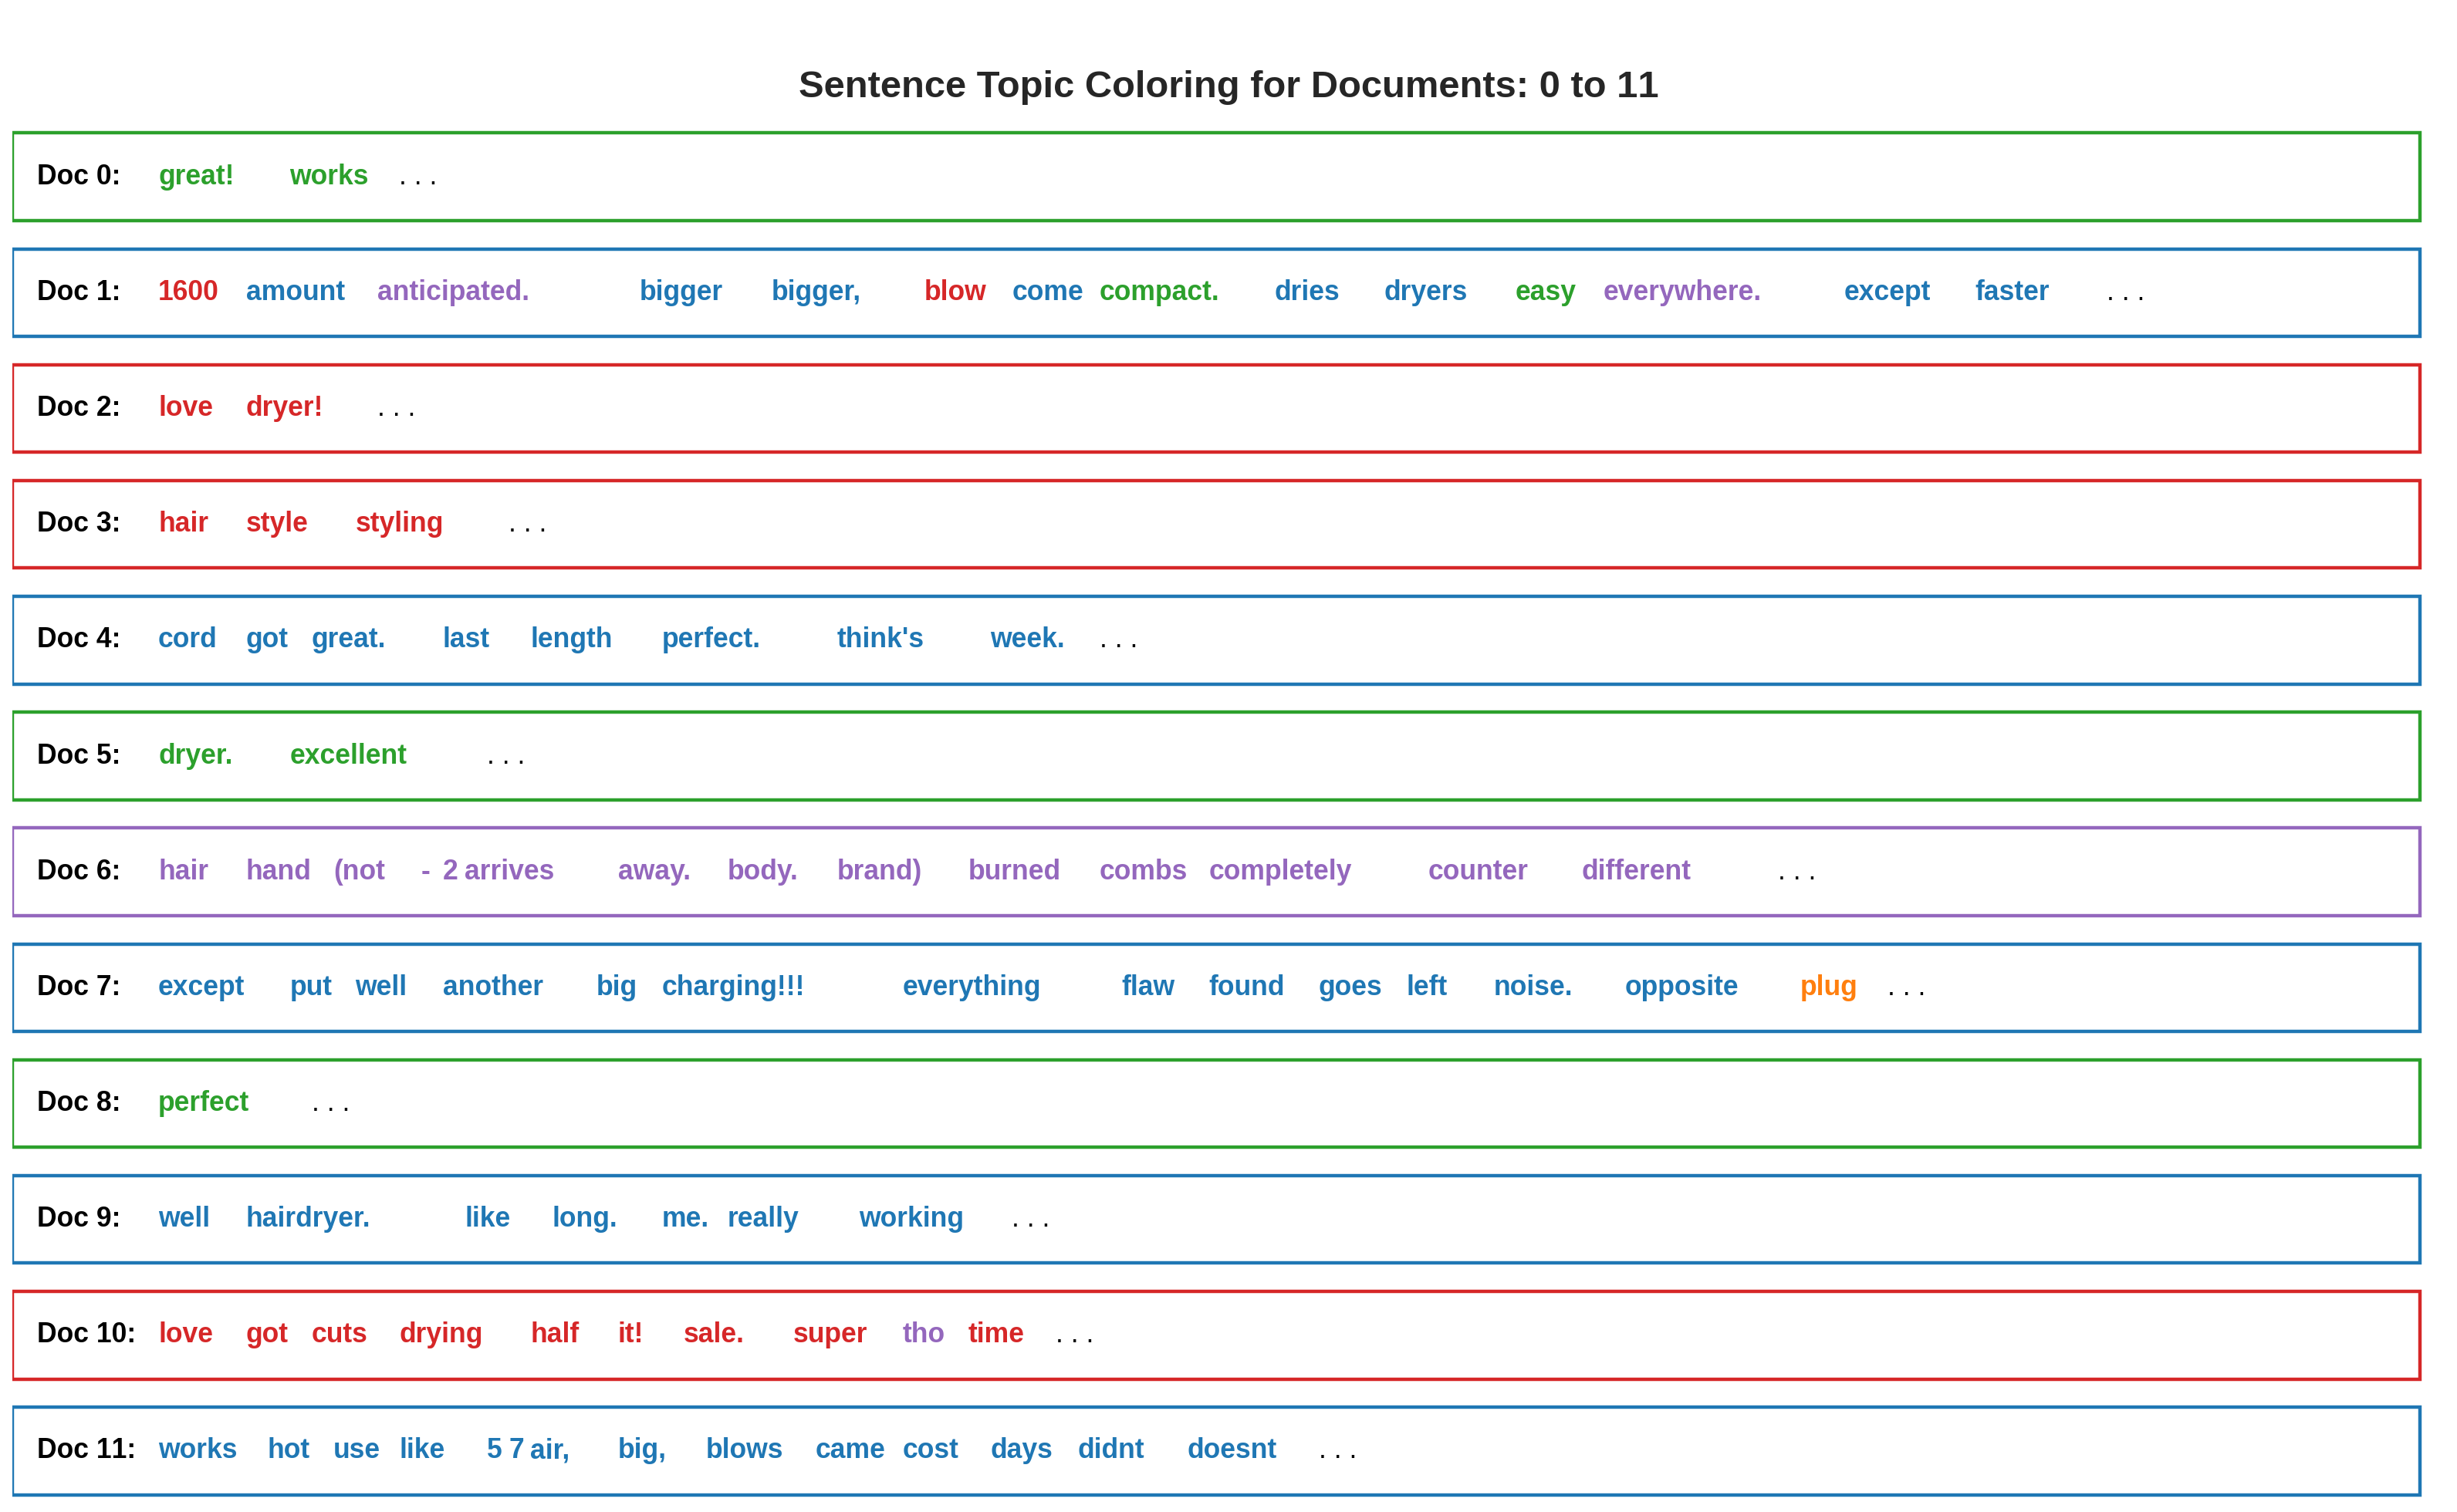

In [107]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model.get_document_topics(corp_cur, per_word_topics = True)
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()    

In [89]:
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_notebook, reset_output
from bokeh.palettes import d3
import bokeh.models as bmo
from bokeh.io import save, output_file
from sklearn.manifold import TSNE


In [111]:
# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda.get_document_topics(corpus, per_word_topics = True)):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)



/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 11343 samples in 0.008s...
[t-SNE] Computed neighbors for 11343 samples in 0.223s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11343
[t-SNE] Computed conditional probabilities for sample 2000 / 11343
[t-SNE] Computed conditional probabilities for sample 3000 / 11343
[t-SNE] Computed conditional probabilities for sample 4000 / 11343
[t-SNE] Computed conditional probabilities for sample 5000 / 11343
[t-SNE] Computed conditional probabilities for sample 6000 / 11343
[t-SNE] Computed conditional probabilities for sample 7000 / 11343
[t-SNE] Computed conditional probabilities for sample 8000 / 11343
[t-SNE] Computed conditional probabilities for sample 9000 / 11343
[t-SNE] Computed conditional probabilities for sample 10000 / 11343
[t-SNE] Computed conditional probabilities for sample 11000 / 11343
[t-SNE] Computed conditional probabilities for sample 11343 / 11343
[t-SNE] Mean sigma: 0.000576


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.387192
[t-SNE] KL divergence after 1000 iterations: 0.759672


In [116]:
# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 5
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])

# mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)


情感分析

In [71]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 119.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 127.3 MB/s eta 0:00:00


In [72]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [86]:
sentiments=[]
for i in range(len(Hair['review_body'])):
        sentiments.append(Hair['review_body'][i][0:512]) # 截断

In [85]:
sentiments[0:10]

['Works great!',
 "This dries my hair faster that bigger, more powerful models. I love travel blow dryers because they are easy to lift and they usually come in 1600 w or less. Bigger dryers are heavy and blow my hair everywhere. This has a surprising amount of power and is very compact. I would give it a five except that the switch is not easy to turn on and off with one hand and it's noisier than I anticipated.",
 'Love this dryer!',
 'styling hair in style',
 "I just got this last week. I think's great. The cord length is perfect.",
 'Excellent dryer.',
 'Gets extremely hot - I have burned my hand on both the metal grate as well as the plastic body. After use I have to keep on the counter because it is too hot to put away. It has melted 2 different combs and now starts to smoke during use. My hair requires high heat to dry completely and not be frizzy, but this is unsafe and ridiculous. As soon as my new model arrives (not this brand) this is going in the trash!',
 'I found everythi

In [84]:
sent_pipeline(sentiments[0:10])

[{'label': 'POSITIVE', 'score': 0.9998733997344971},
 {'label': 'POSITIVE', 'score': 0.9995593428611755},
 {'label': 'POSITIVE', 'score': 0.9997988343238831},
 {'label': 'POSITIVE', 'score': 0.99944669008255},
 {'label': 'POSITIVE', 'score': 0.9998633861541748},
 {'label': 'POSITIVE', 'score': 0.9988516569137573},
 {'label': 'NEGATIVE', 'score': 0.9994151592254639},
 {'label': 'NEGATIVE', 'score': 0.9947106838226318},
 {'label': 'POSITIVE', 'score': 0.9998517036437988},
 {'label': 'POSITIVE', 'score': 0.9996352195739746}]